In [82]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Data Preparing**

In [83]:
data = pd.read_csv('yillara gore il nufuslari2000-2008.csv')

In [84]:
data = data.iloc[10,:]
data = pd.DataFrame(data)

In [85]:
data = data.rename(columns={10: 'Antalya'})
data = data.drop('Yıllara göre il nüfusları, 2000-2021')

In [86]:
data = data.reset_index(drop=True)
data['Yıllar'] = pd.Series(range(2000, 2000+len(data)), index=data.index)
data['Antalya'] = data['Antalya'].apply(lambda x : x.replace(' ',''))
convert_dict = {'Antalya': int}
 
data = data.astype(convert_dict)

print(data.dtypes)
data['Antalya'] = data['Antalya'].apply(lambda x : x/1000000)
data['Yıllar'] = data['Yıllar'].apply(lambda x : x-2000)


Antalya    int32
Yıllar     int64
dtype: object


In [87]:
data.head()

,Antalya,Yıllar
0,1.430539,0
1,1.480282,1
2,1.529110,2
3,1.578367,3
4,1.629338,4


In [88]:
x_train = data.iloc[:,1]
y_train = data.iloc[:,0]

In [89]:
type(x_train)

pandas.core.series.Series

In [90]:
# Convert to 2D array them because scikit learn loves it!
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [91]:
type(x_train)

numpy.ndarray

**Scikit-Learn Functions**

In [92]:
linear_reg = LinearRegression()

In [93]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [96]:
# Prediction
w = linear_reg.coef_
b = linear_reg.intercept_

In [97]:
w,b

(array([[0.057286]]), array([1.40829758]))

In [98]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

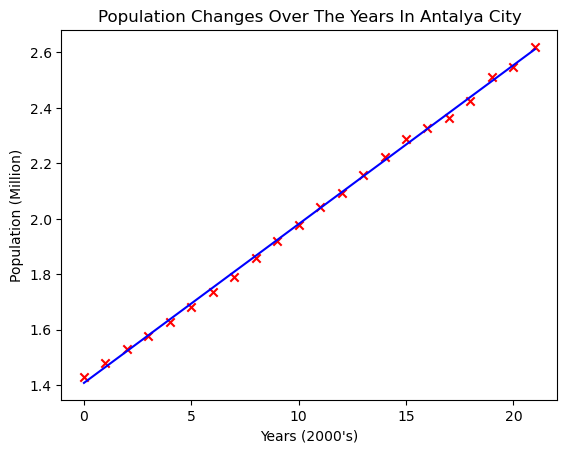

<Figure size 2100x1500 with 0 Axes>

In [99]:
# Plot the linear fit
plt.plot(x_train, predicted, c = 'b')

# Show data set at table
plt.scatter(x_train, y_train, marker ='x', c='r')

#Set the title
plt.title('Population Changes Over The Years In Antalya City')

#Set the y-axis
plt.ylabel('Population (Million)')

#Set the x-axis
plt.xlabel("Years (2000's)")


plt.figure(figsize=(7,5), dpi=300)
plt.show()

In [106]:
# A function which shows prediction of years according to algorithm
def enter_year():
    year = int(input('Please enter a year that you wonder: ' ))
    predicted_year = float(w) * (year-2000) + float(b)
    print(f"Population of Antalya in {year} is {predicted_year:.2f} million")

In [107]:
enter_year()

Please enter a year that you wonder: 2017
Population of Antalya in 2017 is 2.38 million
